### MLP for multiclass classification
using sparse_categorical_crossentropy loss in Keras

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adamax
import matplotlib.pyplot as plt
from IPython import display
import numpy as np
import pandas as pd

### Load the data

In [2]:
fruits = pd.read_csv('fruit_data_with_colors.csv')

In [3]:
fruits

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [4]:
fruits.fruit_label-=1
fruits

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,0,apple,granny_smith,192,8.4,7.3,0.55
1,0,apple,granny_smith,180,8.0,6.8,0.59
2,0,apple,granny_smith,176,7.4,7.2,0.60
3,1,mandarin,mandarin,86,6.2,4.7,0.80
4,1,mandarin,mandarin,84,6.0,4.6,0.79
5,1,mandarin,mandarin,80,5.8,4.3,0.77
6,1,mandarin,mandarin,80,5.9,4.3,0.81
7,1,mandarin,mandarin,76,5.8,4.0,0.81
8,0,apple,braeburn,178,7.1,7.8,0.92
9,0,apple,braeburn,172,7.4,7.0,0.89


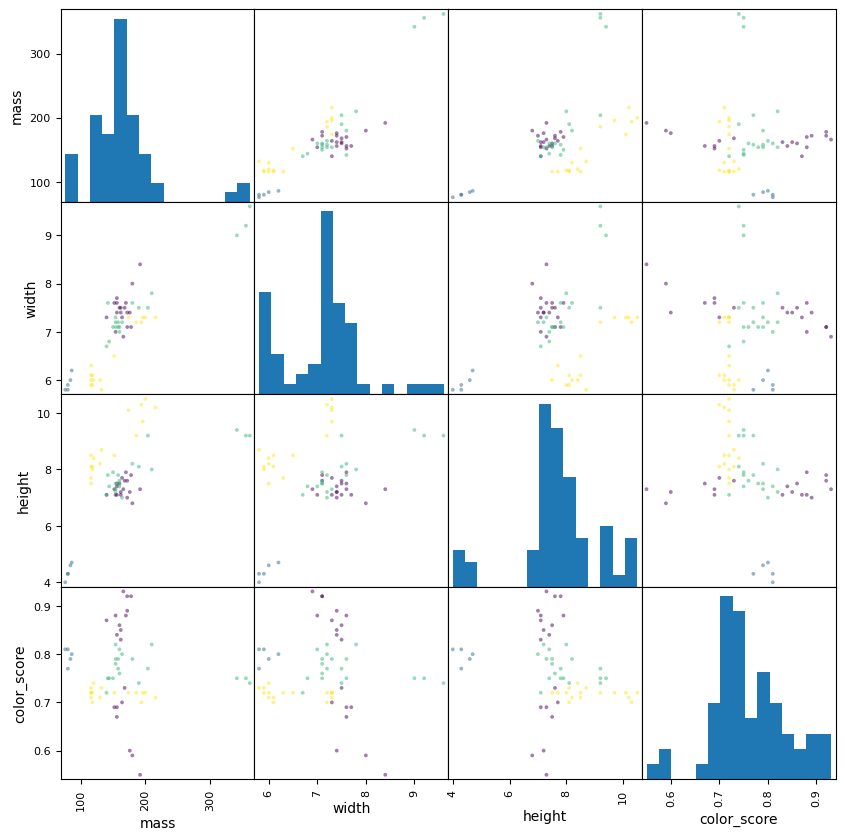

In [5]:
X = fruits.iloc[:,1:]
Y = fruits['fruit_label']
scatter = pd.plotting.scatter_matrix(X, c= Y, marker = '.', s=30, hist_kwds={'bins':15}, figsize=(10,10))

In [6]:
from sklearn.model_selection import train_test_split
X = fruits[['width', 'height', 'color_score']].values
Y = fruits['fruit_label'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

create a validation set

In [7]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=0)
print('train:', x_train.shape, y_train.shape)
print('validation:', x_val.shape, y_val.shape)
print('test:', x_test.shape, y_test.shape)

train: (42, 3) (42,)
validation: (5, 3) (5,)
test: (12, 3) (12,)


## Try logistiRegression

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
LR=LogisticRegression(solver='newton-cg')
LR.fit(x_train, y_train)

LogisticRegression(solver='newton-cg')

In [10]:
LR.score(x_test, y_test)

0.8333333333333334

### Define the MLP model

In [11]:
model = Sequential()
model.add(Dense(units=8, activation='softplus', input_shape=(3,)))
model.add(Dense(units=8, activation='softplus'))
model.add(Dense(units=4,  activation='softmax')) #use softmax for multiclass classification
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adamax(learning_rate=0.1), 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 32        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
Total params: 140 (560.00 Byte)
Trainable params: 140 (560.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
loss_train_list=[]
loss_val_list=[]
acc_train_list=[]
acc_val_list=[]

### Train the model

In [13]:
for epoch in range(0, 100):   
    print('epoch', epoch)
    #set epochs=1
    history=model.fit(x_train, y_train, batch_size=16, epochs=1, validation_data=(x_val, y_val))
    loss_train_list.extend(history.history['loss'])
    loss_val_list.extend(history.history['val_loss'])
    acc_train_list.extend(history.history['accuracy'])
    acc_val_list.extend(history.history['val_accuracy'])
    #save the model to a keras file 
    model.save('NN_multiclass_classification_Keras_sCE_e'+str(epoch)+'.keras')

epoch 0
3/3 [==============================] - 0s 48ms/step - loss: 2.8278 - accuracy: 0.3095 - val_loss: 2.8660 - val_accuracy: 0.2000
epoch 1
3/3 [==============================] - 0s 17ms/step - loss: 1.8040 - accuracy: 0.1905 - val_loss: 1.0605 - val_accuracy: 0.4000
epoch 2
3/3 [==============================] - 0s 16ms/step - loss: 1.3790 - accuracy: 0.2857 - val_loss: 1.1249 - val_accuracy: 0.4000
epoch 3
3/3 [==============================] - 0s 16ms/step - loss: 1.2569 - accuracy: 0.3333 - val_loss: 1.2137 - val_accuracy: 0.4000
epoch 4
3/3 [==============================] - 0s 23ms/step - loss: 1.2714 - accuracy: 0.3810 - val_loss: 1.1799 - val_accuracy: 0.6000
epoch 5
3/3 [==============================] - 0s 16ms/step - loss: 1.2186 - accuracy: 0.6190 - val_loss: 1.0475 - val_accuracy: 0.6000
epoch 6
3/3 [==============================] - 0s 16ms/step - loss: 1.1723 - accuracy: 0.4048 - val_loss: 0.9695 - val_accuracy: 0.6000
epoch 7
3/3 [==============================] - 0

epoch 60
3/3 [==============================] - 0s 23ms/step - loss: 0.4268 - accuracy: 0.8095 - val_loss: 0.2145 - val_accuracy: 1.0000
epoch 61
3/3 [==============================] - 0s 21ms/step - loss: 0.4471 - accuracy: 0.7619 - val_loss: 0.2109 - val_accuracy: 1.0000
epoch 62
3/3 [==============================] - 0s 31ms/step - loss: 0.4694 - accuracy: 0.8095 - val_loss: 0.2303 - val_accuracy: 0.8000
epoch 63
3/3 [==============================] - 0s 26ms/step - loss: 0.4107 - accuracy: 0.8095 - val_loss: 0.2871 - val_accuracy: 1.0000
epoch 64
3/3 [==============================] - 0s 27ms/step - loss: 0.5145 - accuracy: 0.6905 - val_loss: 0.2581 - val_accuracy: 0.8000
epoch 65
3/3 [==============================] - 0s 32ms/step - loss: 0.6407 - accuracy: 0.7857 - val_loss: 0.2736 - val_accuracy: 0.8000
epoch 66
3/3 [==============================] - 0s 23ms/step - loss: 0.4031 - accuracy: 0.8333 - val_loss: 0.4527 - val_accuracy: 0.8000
epoch 67
3/3 [===========================

### Plot training loss vs epoch and validation loss vs epoch

In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

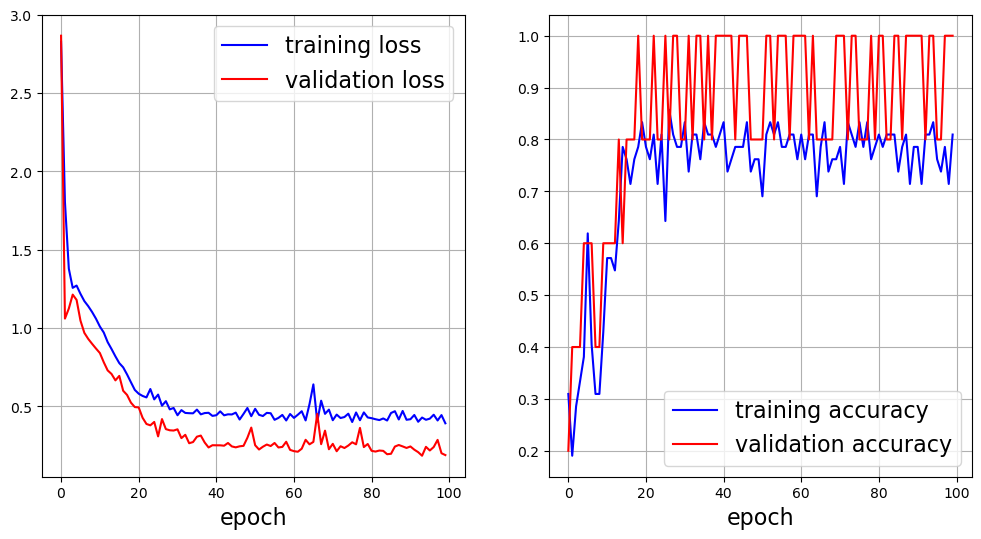

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(np.arange(0,len(loss_train_list)), loss_train_list, '-b', label='training loss')
ax[0].plot(np.arange(0,len(loss_val_list)), loss_val_list, '-r', label='validation loss')
ax[0].set_xlabel('epoch',fontsize=16)
ax[0].legend(fontsize=16)
ax[0].grid(True)
ax[1].plot(np.arange(0,len(acc_train_list)), acc_train_list, '-b', label='training accuracy')
ax[1].plot(np.arange(0,len(acc_val_list)), acc_val_list, '-r', label='validation accuracy')
ax[1].set_xlabel('epoch',fontsize=16)
ax[1].legend(fontsize=16)
ax[1].grid(True)

after training, we load the best model

In [16]:
best_idx= np.argmax(acc_val_list)
best_idx

18

In [17]:
from tensorflow.keras.models import load_model
model = load_model('NN_multiclass_classification_Keras_sCE_e'+str(best_idx)+'.keras')

### Test the model

In [18]:
score = model.evaluate(x_test, y_test, batch_size=64, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6498416066169739
Test accuracy: 0.8333333134651184


### Make Prediction on the test set

In [19]:
y_test_pred=model.predict(x_test, batch_size=64)

1/1 [==============================] - 0s 55ms/step


In [20]:
y_test_pred[1]

array([0.265279  , 0.00539353, 0.45660907, 0.27271837], dtype=float32)

In [21]:
np.argmax(y_test_pred[1])

2

In [22]:
y_test[0]

2